<div style="width: 90%; margin: auto; background-color: black; padding: 20px; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3); color: #ffffff; text-align: center; font-style: italic;" markdown="1">
    <span style="font-style: ; font-size: 40px; font-weight: bold; ">  MACHINE LEARNING PROJECT</span>
</div>




## Objectif :
#### - Comprendre au mieux possible nos donnees 
#### - Developper une premiere strategie de modelisation 

<div style="width: 90%; margin: auto; padding: 10px; background-color: #ecf0f1; border-radius: 0 12px 12px 12px; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3);" markdown="1">
    <h2 style="color: darkblue; font-size: 30px"><strong>Breakdown of this notebook:</strong></h2>
</div>

<div style="width: 90%; margin: auto; background-color: #ecf0f1; border-radius: 0 12px 12px 12px; text-align: left; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3);"  markdown="1">
<ol style="color: blue; font-size: 15px ;  font-weight: bold; margin: 20px;">
    <li>DATA OVERVIEW:
        <ul>
            <li>Importation des  Libraries</li>
            <li>impoRtation de la dataset</li>
            <li> Analyse de la forme des données</li>
     </ul>
    <li>Data Visualization:
        <ul>
            <li> Nettoyage des données</li>
            <li> Relations entre les variables </li>
            <li>Correlation entre differents variables.</li>
            <li> Clusterisation des données </li>
      </ul>
    <li>BULDING CLASSIFICATION MODELS 
        <ul>
            <li>Dummy Classifier</li>
            <li>Random Forest Classifier</li>
            <li>XGBoost Classifier</li>
            <li>Gradient Boosting </li>
            <li>VotingClassifier</li> 
        </ul>
  </li>
  <li>HYPERPARAMETER TUNING </li> 
  <li>FEATURE IMPORTANCE </li> 
        
    
    
</ol>
</div>

#  Description de la Dataset
Cette dataset rassemble des données de signaux biologiques élémentaires liées à la santé.
L'objectif est de <strong> déterminer la présence ou l'absence de tabagisme à partir de ces signaux biologiques </strong>.
Il s'agit d'identifier, à partir des signaux biologiques, <strong>si une personne fume ou non</strong>.

<div style="width: 90%; margin: auto; background-color: #274d3e; padding: 20px; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3); color: #ffffff; text-align: center; font-style: italic;" markdown="1">
    <span style="font-style: italic; font-size: 30px; font-weight: bold; ">DATA OVERVIEW</span>
</div>

   ## importation des librairies

In [3]:
pip install lightgbm

In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer

from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score,roc_curve,auc,precision_score,recall_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

 ## importons notre Dataset

In [6]:
df1 = pd.read_csv('smoking.csv')
df = df1.copy()
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


 ## Analyse de la forme des donnees 

In [7]:
# Dimension de la Dataset
df.shape

(55692, 27)

La dataset contient 55692 lignes et  27 colones, ce qui respecte les contraintes du projet

In [8]:
# les colones de la dataset et la variable target
df.columns.unique()

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [9]:
#information generale sur les donnees 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

En analysant les colones on retrouve la variable target: <strong>"smoking"</strong>

In [10]:
# identification des types de variables 
df.dtypes.value_counts()

float64    18
int64       6
object      3
dtype: int64

La dataset contient 18 variables de types ,<strong>float </strong>, 6 de type  <strong> int </strong> et 3 de type <strong>object</strong>

In [11]:
# description statistique
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [12]:
# identification des features numeriques et categoriel

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [13]:
df[categorical_cols].nunique()

gender    2
oral      1
tartar    2
dtype: int64

 Les variables categorielles sont : <strong>"gender", "oral", "tartar" </strong>

In [14]:
#Analyse des valeurs manquantes
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

<AxesSubplot:>

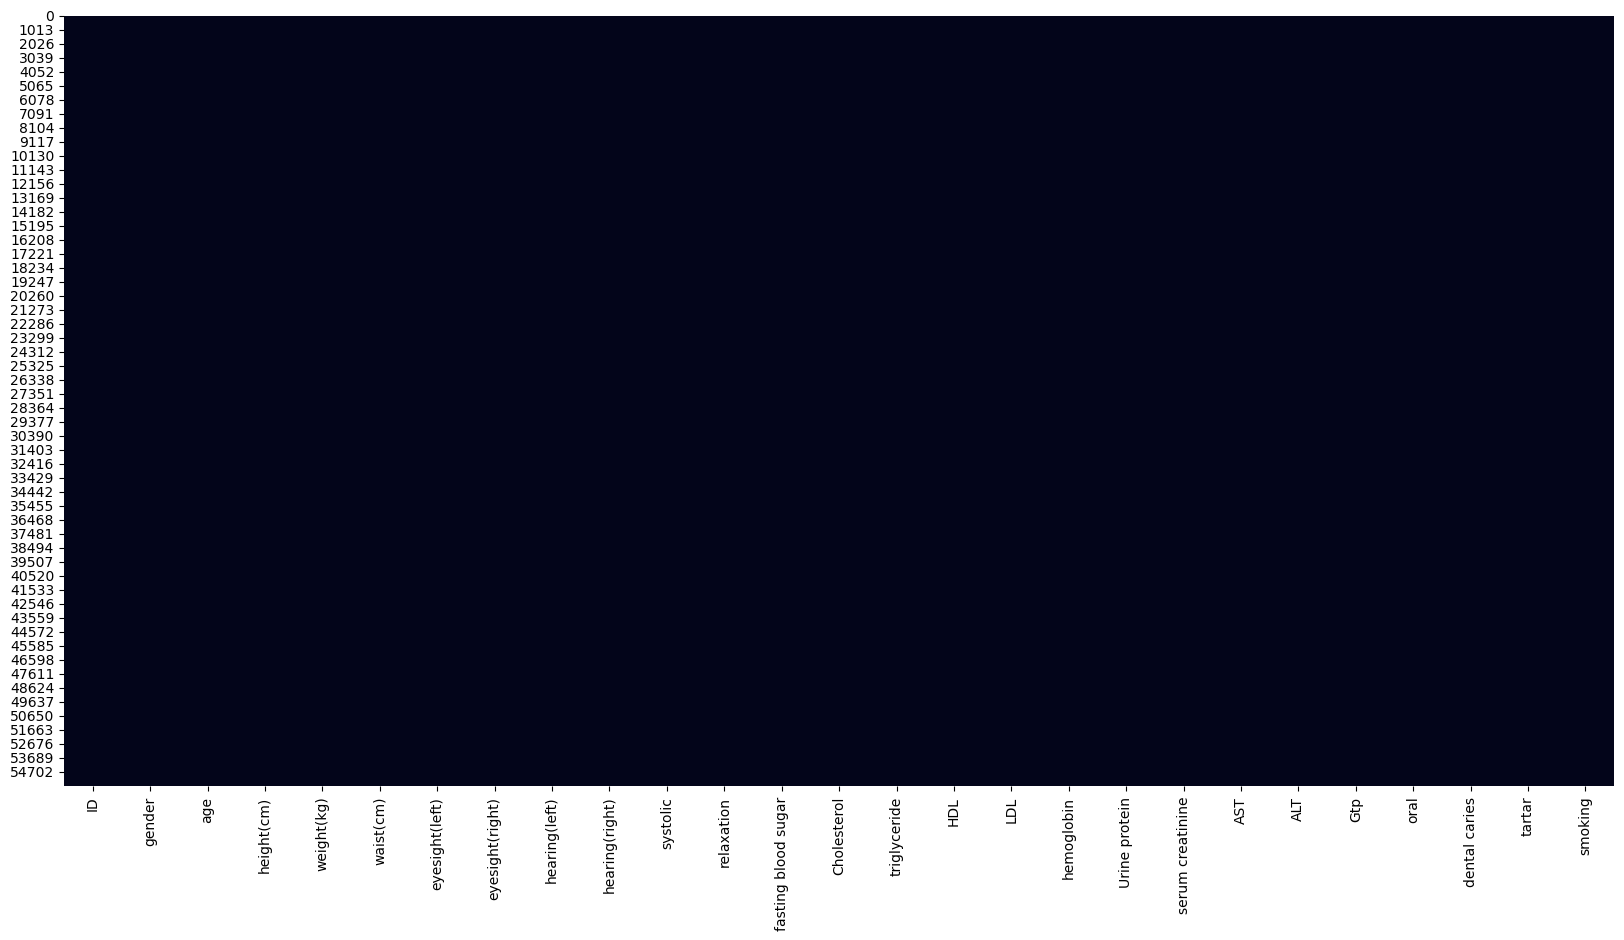

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(df.isna(), cbar = False)

Notre  dataset ne contient aucune valeur manquante.
Ce qui est une tres bonne nouvelle car on aura pas a nettoyer nos donnees

<div style="width: 90%; margin: auto; background-color: #274d3e; padding: 20px; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3); color: #ffffff; text-align: center; font-style: italic;" markdown="1">
    <span style="font-style: italic; font-size: 30px; font-weight: bold; ">DATA VISUALIZATION</span>
</div>

   ##                                             Data Cleaning
   
  Notre dataset etant deja "propre", on va juste eliminer la variable "ID" qui n'est pas utile

In [16]:
df.drop(columns=['ID'], axis =1,inplace=True)


## Analyse de la variable target

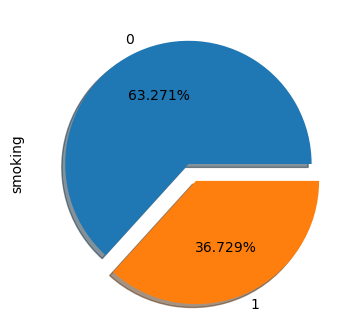

In [17]:
plt.figure(figsize = [7, 4], clear = True)
df["smoking"].value_counts().plot.pie(explode = [0, 0.15], autopct = '%1.3f%%', shadow = True);


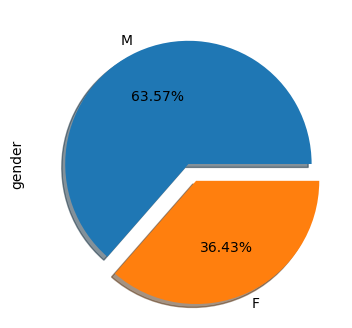

In [18]:
plt.figure(figsize = [7, 4], clear = True)
df["gender"].value_counts().plot.pie(explode = [0, 0.15], autopct = '%1.2f%%', shadow = True);

Il y'a plus d'échantillon male que femelle dans cette dataset

Il y'a 63.2% de fumeurs et 36.7% de non fumeurs . Les données de la target sont désequilibrés ( Unbalanced dataset )

In [19]:
# identification des features numeriques et categoriel

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

## Distribution des varaiables numeriques  ( signification des donnees)

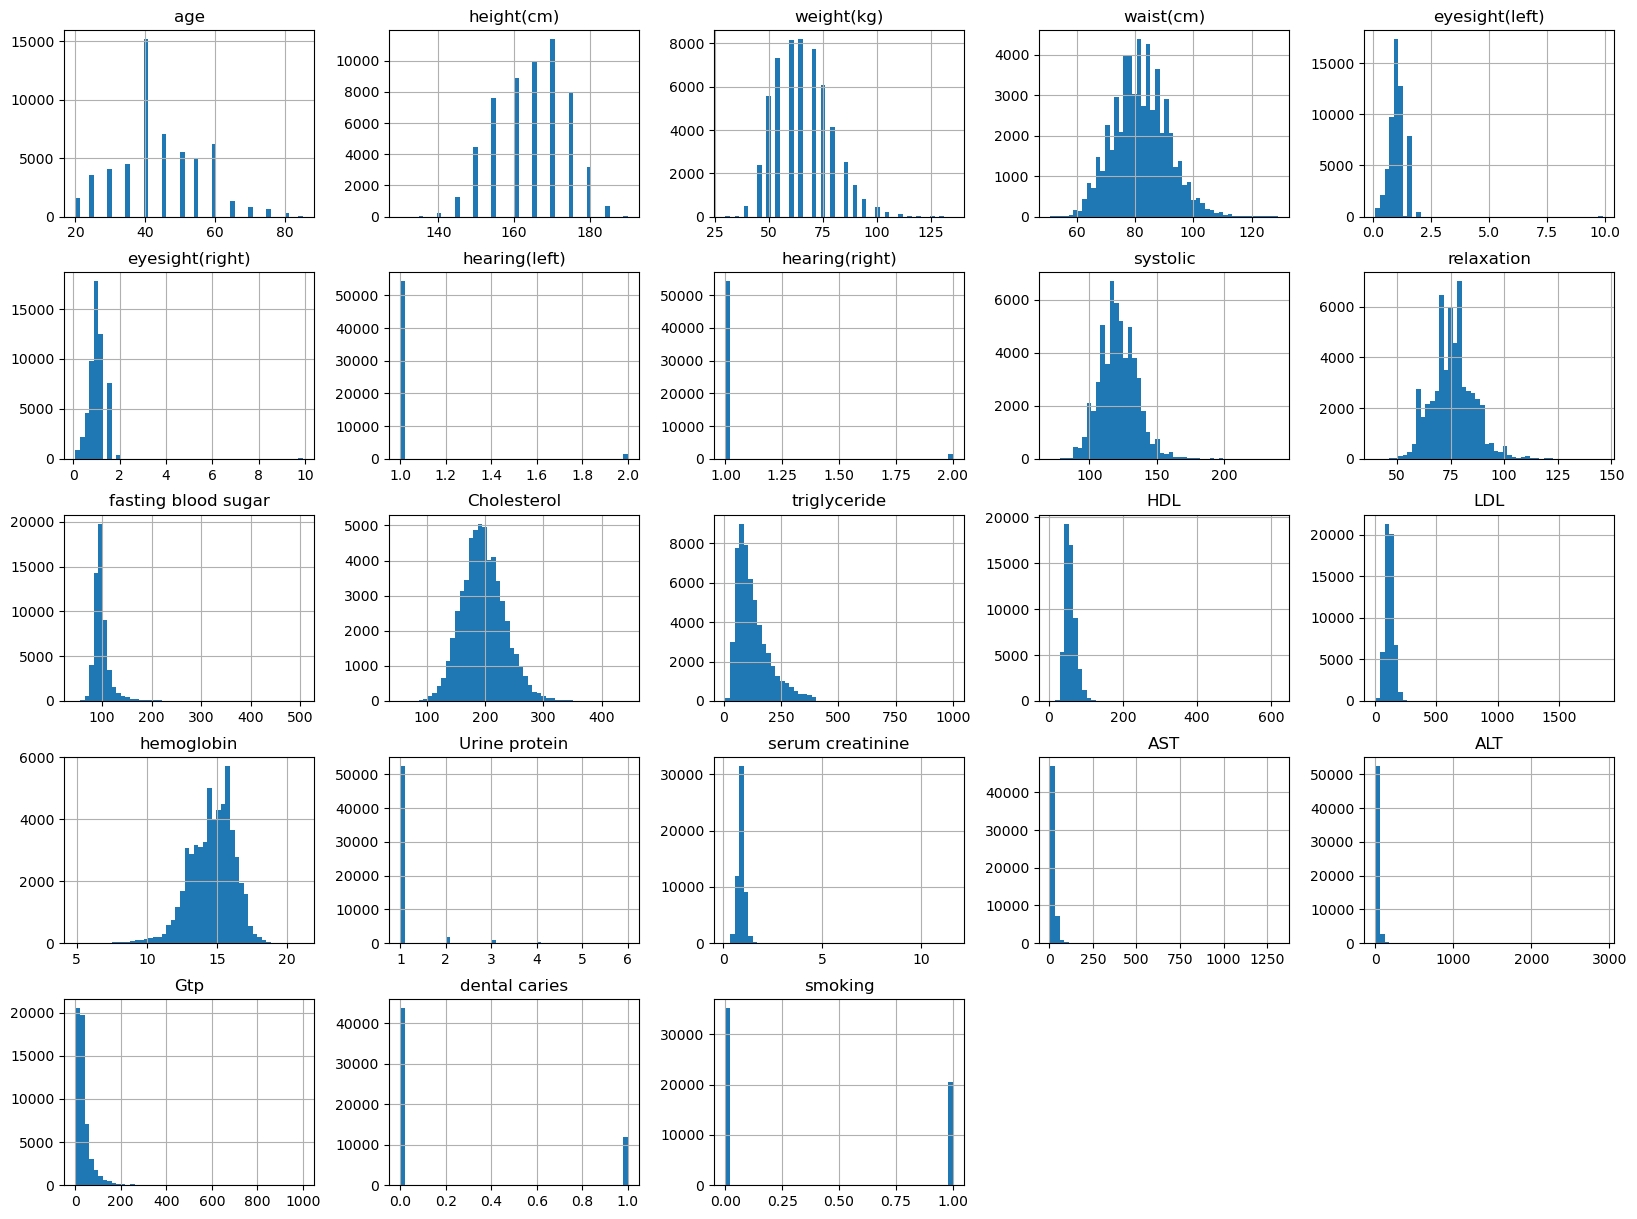

In [20]:
df.hist(bins=50,figsize=(20,15))
plt.show()


Nous observons une distribution normale et asymetrique dans les donnees.
les donnees ne sont pas centre en 0 (elle ne sont pas normalisees).



 # Anslyse des relations entre les variables

# Relation target/age

<AxesSubplot:xlabel='age', ylabel='count'>

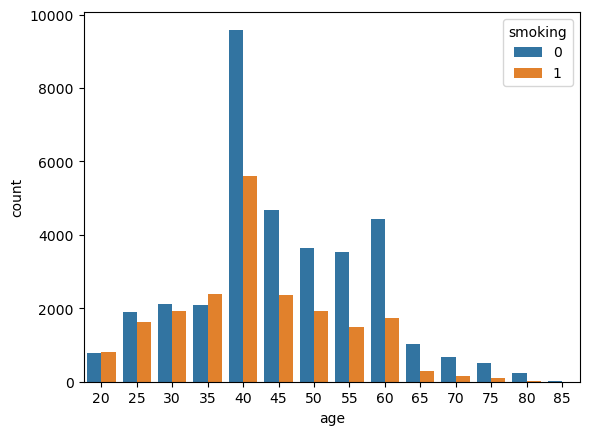

In [21]:
sns.countplot(x = "age", hue = "smoking",data=df)

l'age ne permet pas de savoir si une personne fume ou pas (pas d'écart considérable)

# Relation target/tarter , dental caries

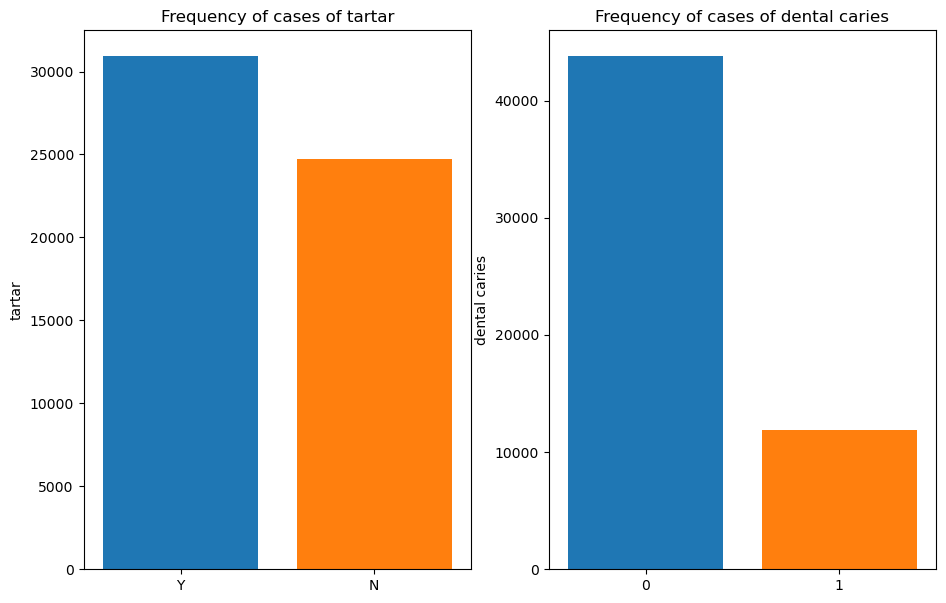

In [22]:
fig, axes = plt.subplots(1, 2, figsize = (11, 7))
axes = axes.flatten()


sns.barplot(ax = axes[0],
            x = df["tartar"].value_counts().index,
            y = df["tartar"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of cases of tartar");

sns.barplot(ax = axes[1],
            x = df["dental caries"].value_counts().index,
            y = df["dental caries"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of cases of dental caries");

On remarque bien qu'il y'a plus d'accumulation de bactéries dans les dents et des caries dentaires chez les fumeurs que les non fumeurs .

On prévoit que les variables 'tartar' et 'dental caries' seront des facteurs décisives et important pour le modèle de classification   

## Correlation entre les les differentes variables

<AxesSubplot:>

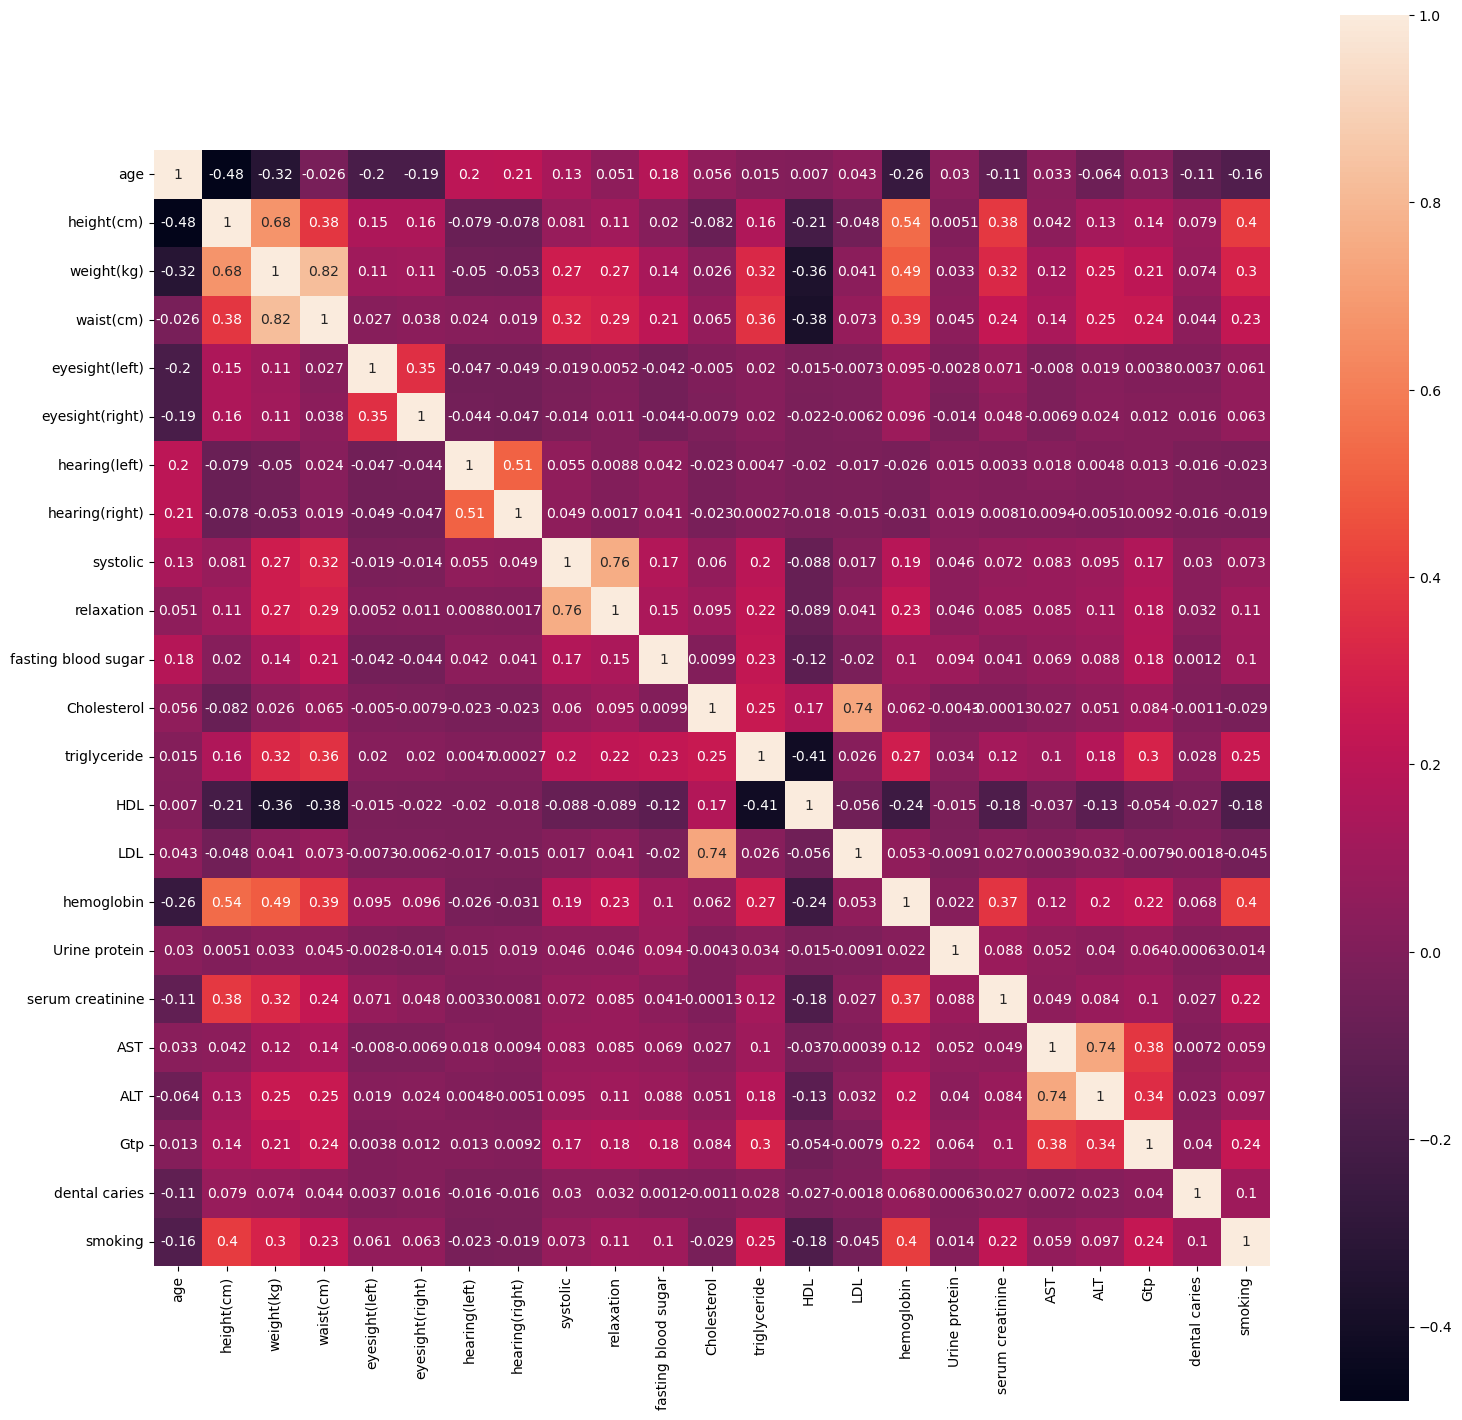

In [23]:
df_corr = df[numeric_cols].corr()
plt.subplots(figsize=(18,18))
sns.heatmap(df_corr,annot=True, square=True)

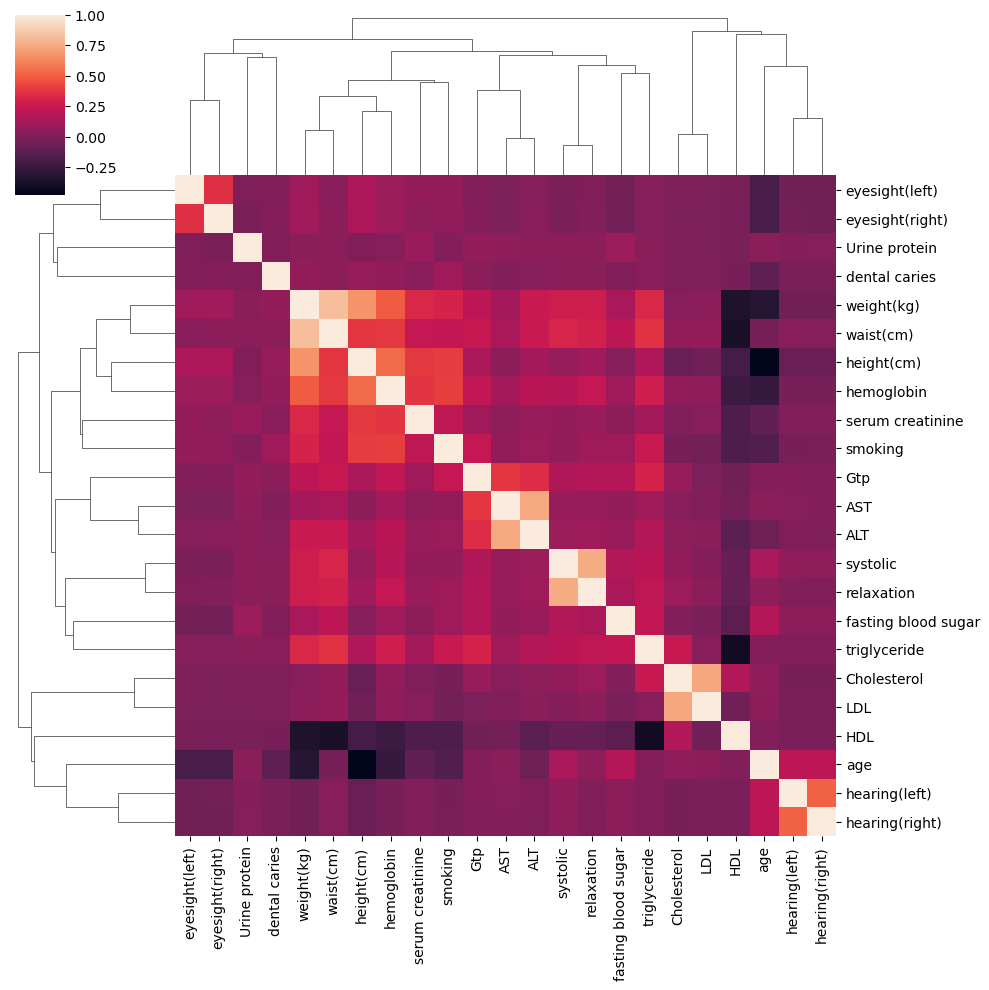

In [24]:
sns.clustermap(df_corr)

- on observe des correlations entre certains variables
- les variales "weight" et "waist" sont les plus corrélées dans la dataset . 

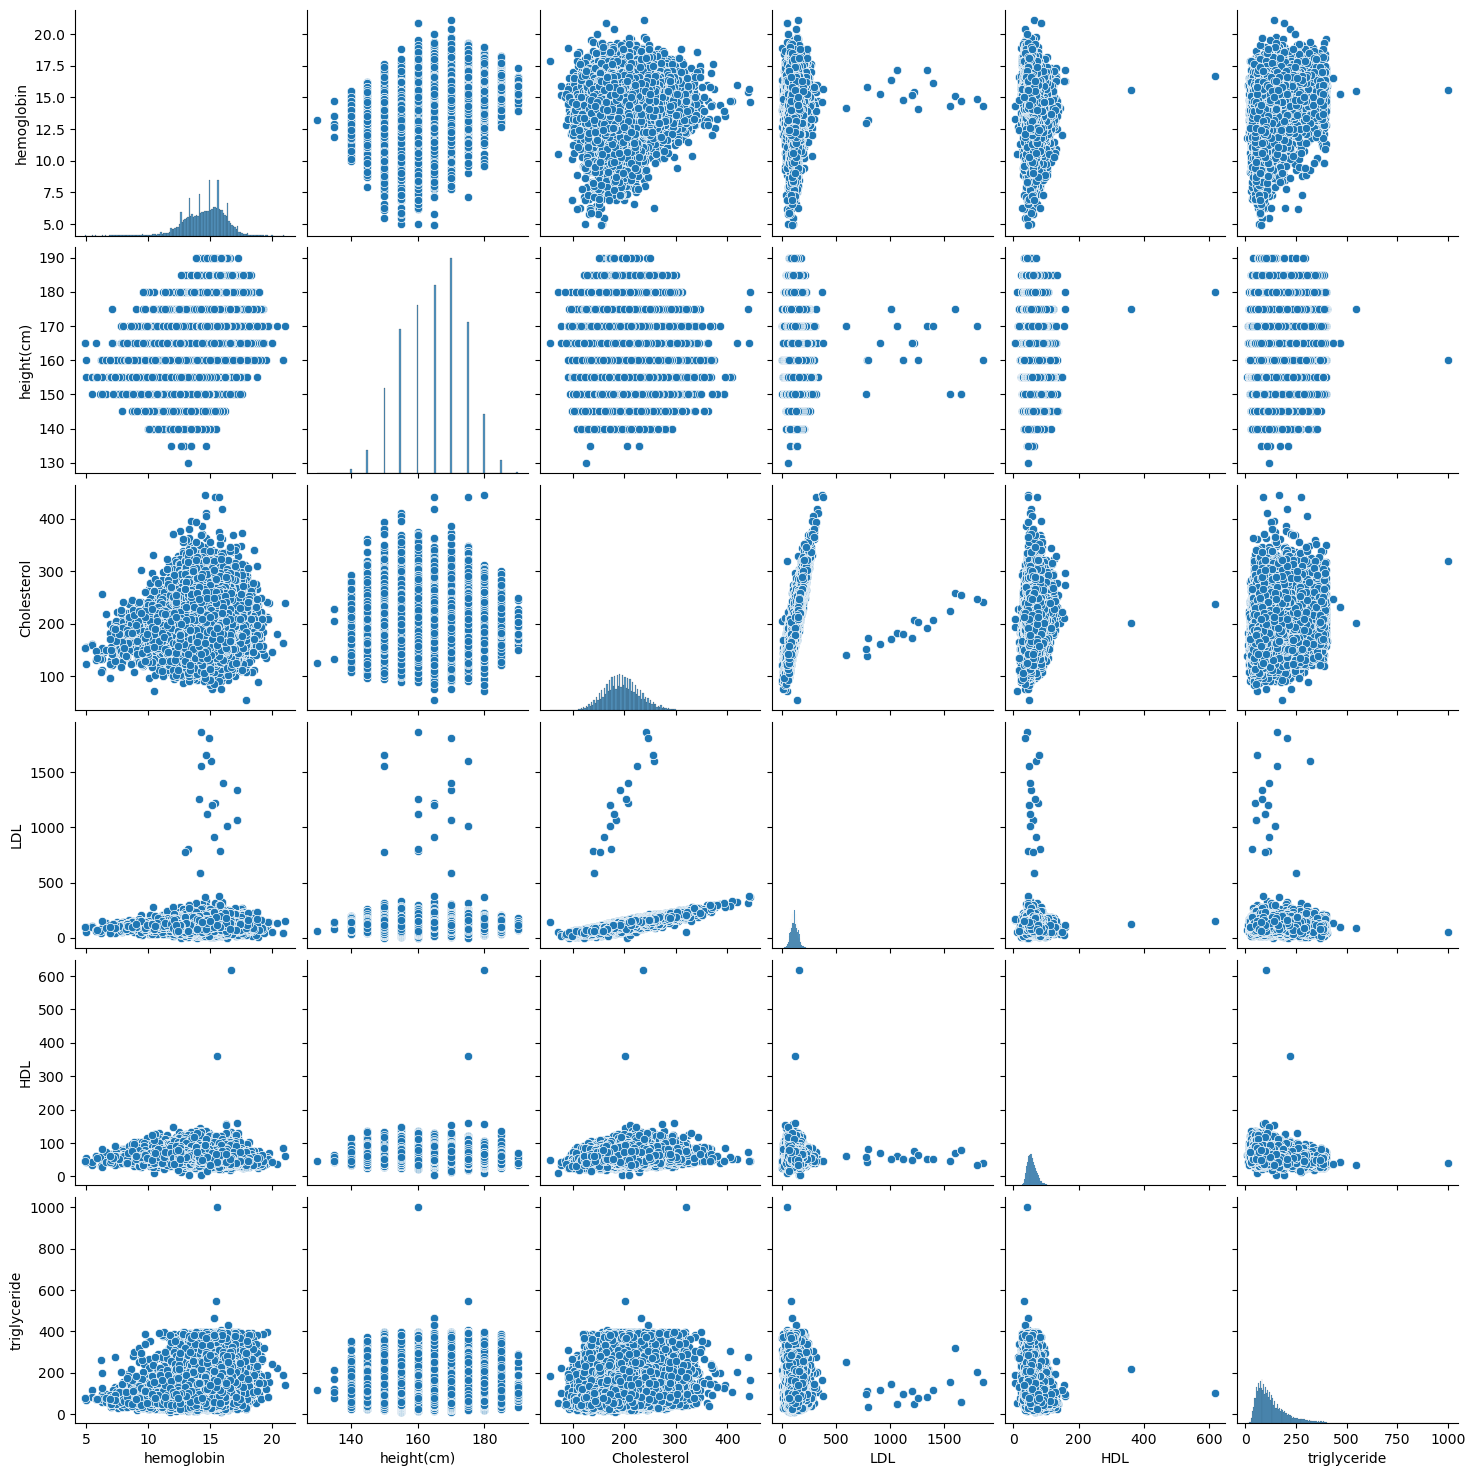

In [25]:
features_to_explore = ['hemoglobin','height(cm)','Cholesterol','LDL','HDL','triglyceride']
selected_features_df = df[features_to_explore]

sns.pairplot(selected_features_df)
plt.show()

## Relation entre weight(kg)/ autres variable

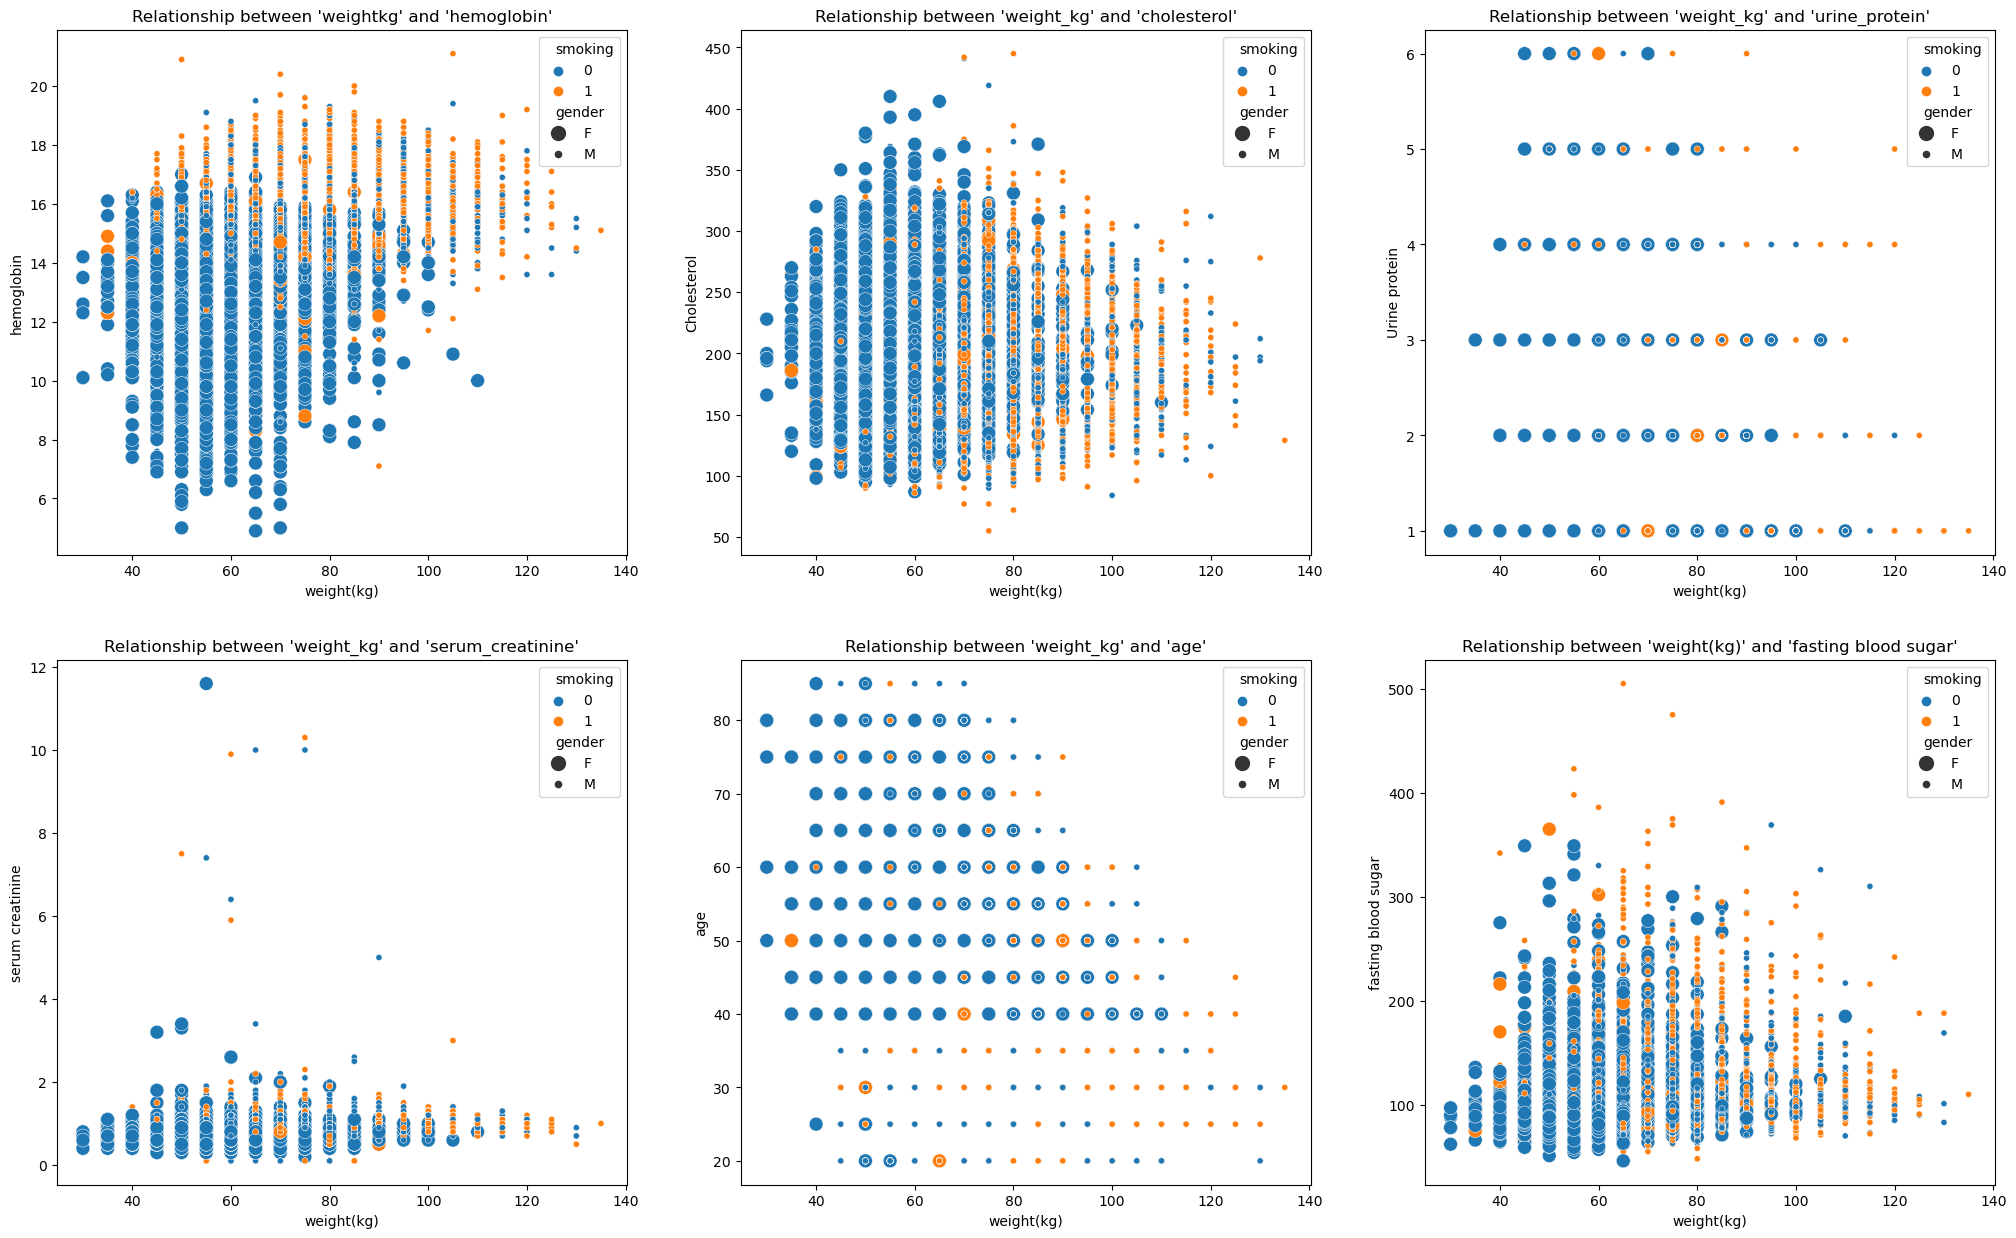

In [27]:
fig, axes = plt.subplots(2, 3, figsize = (25, 15))
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x = "weight(kg)", y = "hemoglobin", hue = "smoking", size = "gender", sizes = (20, 100), legend="full",
                data = df).set(title = "Relationship between 'weightkg' and 'hemoglobin'");


sns.scatterplot(ax = axes[1], x = "weight(kg)", y = "Cholesterol", hue = "smoking", size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight_kg' and 'cholesterol'");


sns.scatterplot(ax = axes[2], x = "weight(kg)", y = "Urine protein", hue = "smoking", size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight_kg' and 'urine_protein'");


sns.scatterplot(ax = axes[3], x = "weight(kg)", y = "serum creatinine", hue = "smoking", size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight_kg' and 'serum_creatinine'");


sns.scatterplot(ax = axes[4], x = "weight(kg)", y = "age", hue = "smoking", size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight_kg' and 'age'");


sns.scatterplot(ax = axes[5], x = "weight(kg)", y = "fasting blood sugar", hue = "smoking", size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight(kg)' and 'fasting blood sugar'");


Ces tracés nous permettent de vérifier qu'il est possible d'implémenter un modéle de classification qui sera performant car on arrive géneralement à distinguer les zones de couleurs (target) sur chaque graphe

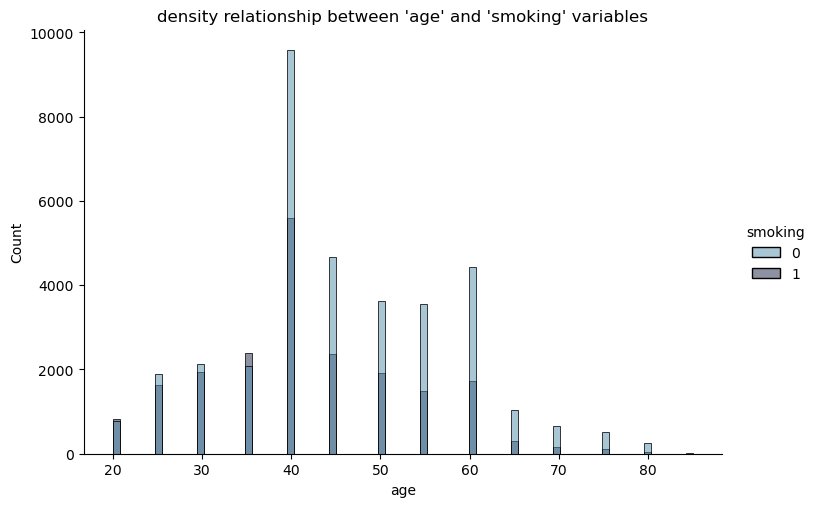

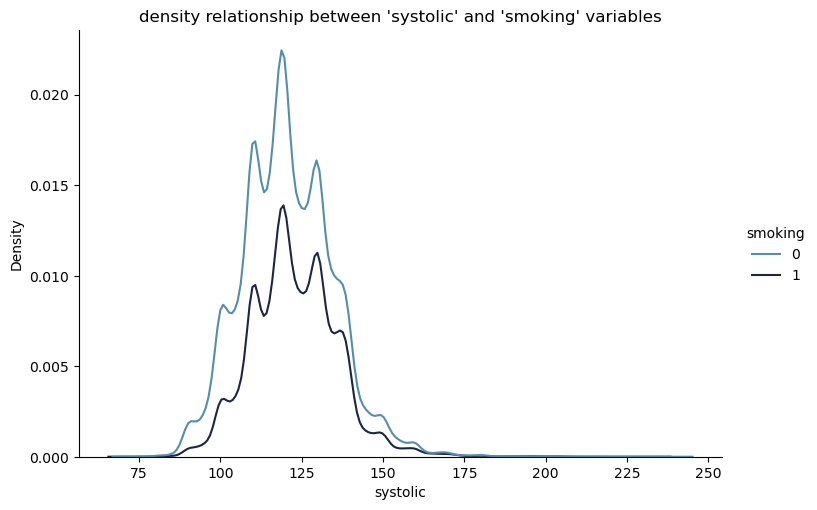

In [28]:
sns.displot(data = df, x = "age", hue = "smoking", kind = "hist", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title =  "density relationship between 'age' and 'smoking' variables");

sns.displot(data = df, x = "systolic", hue = "smoking", kind = "kde", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title = "density relationship between 'systolic' and 'smoking' variables");

Analyse par rapport à l'age :

- On remarque d'abord que pour toutes les tranches d'ages , il y'a plus de fumeurs que de non fumeurs 
- On arrive à détecter trois différents tranches ( clusters ) : Jeunes , adultes , vieux : Donc il serait possible d'affiner le modéle pour le permettre de cibler ces tranches la ( par exemple rajouter une colonne qui permet de spécifier ces tranches la et de lui donner un poids ou tronquer la dataset et établir un modéle sur chaque tranche ) 

Analyse par rapport à systolic ( pression artérielle ) :

- On remarque un écart considérable des valeurs de pression entre les fumeurs et les non fumeurs : Donc , on prévoit que ce feature serait décisive et important pour la classification .


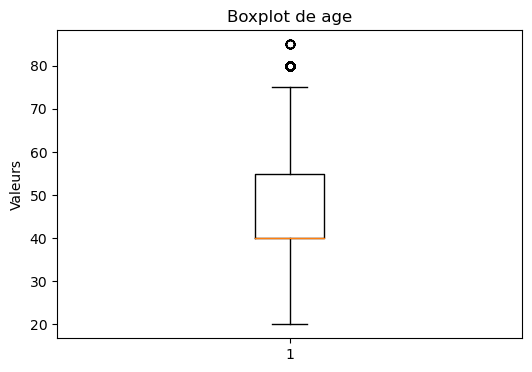

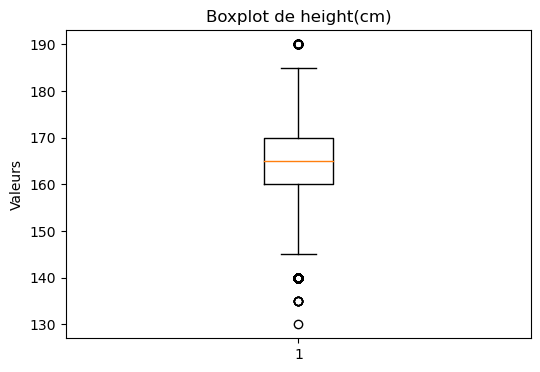

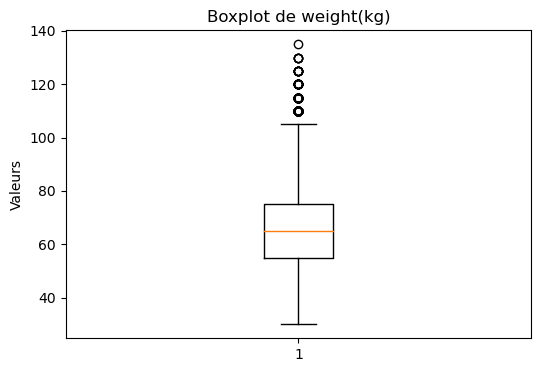

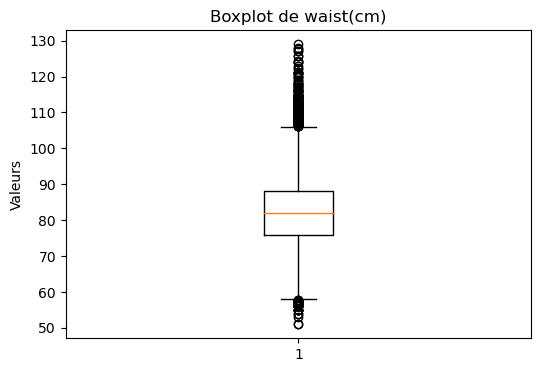

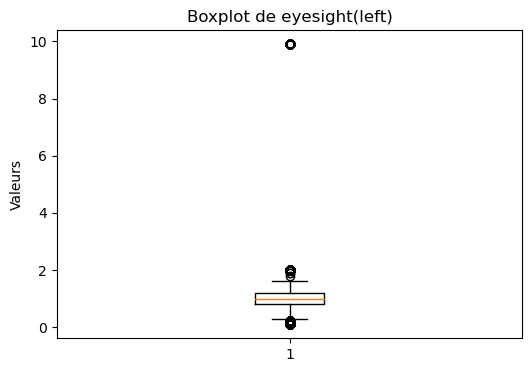

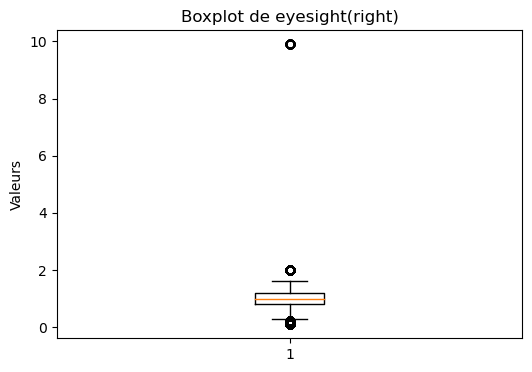

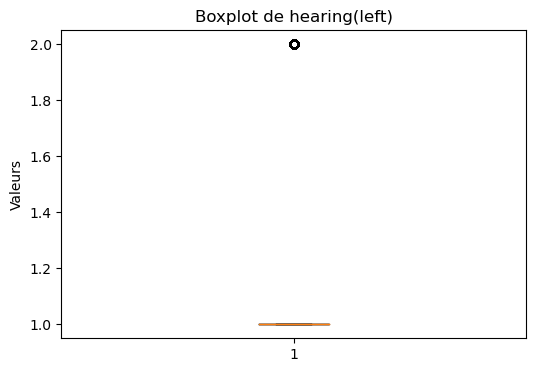

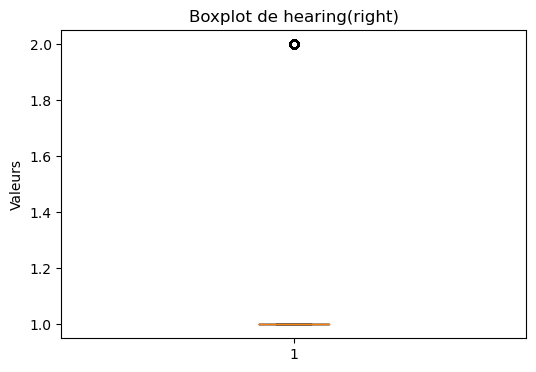

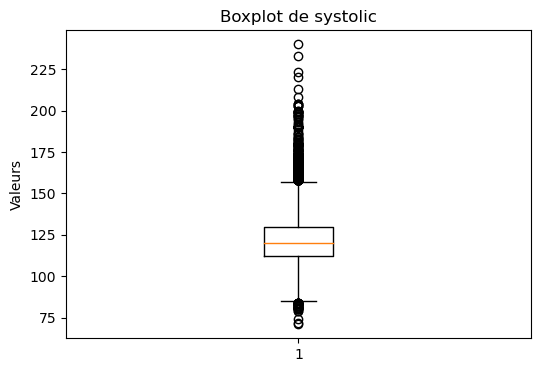

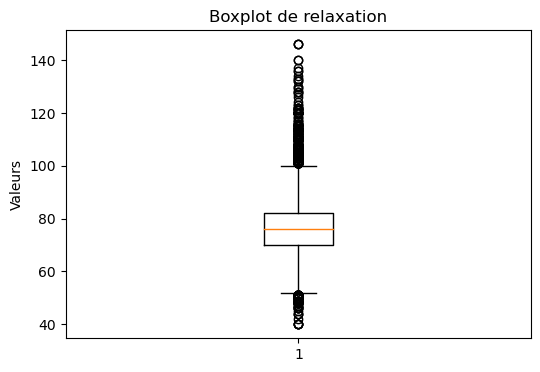

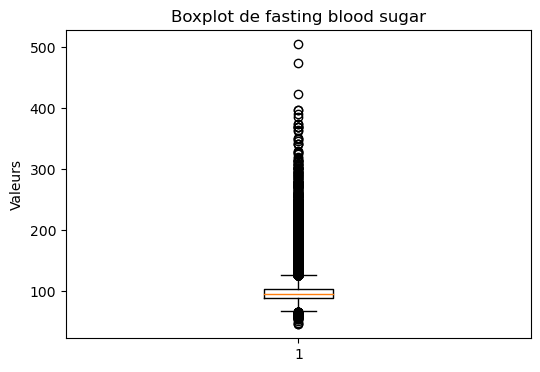

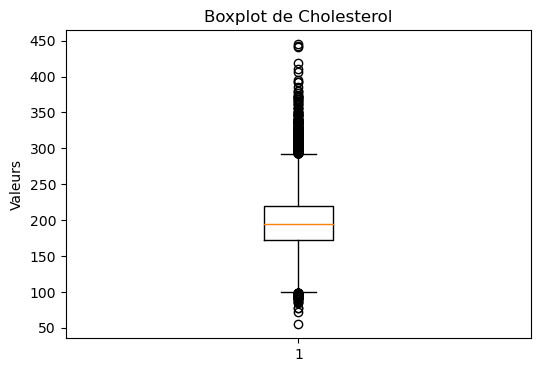

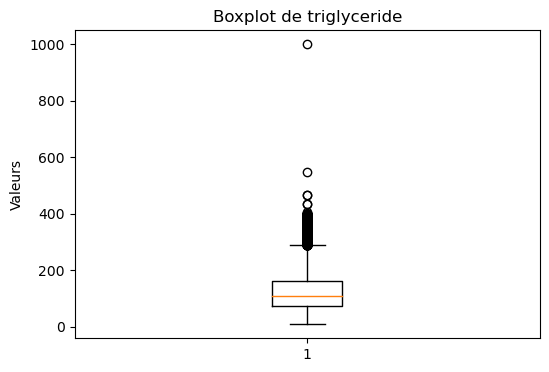

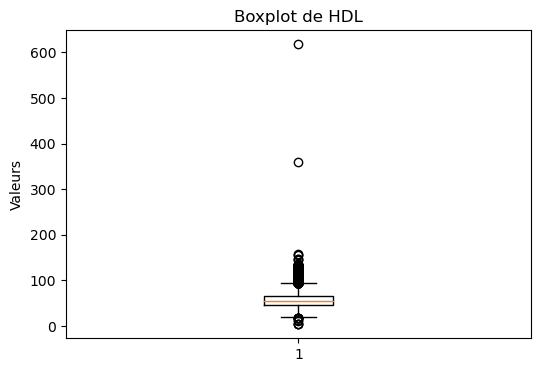

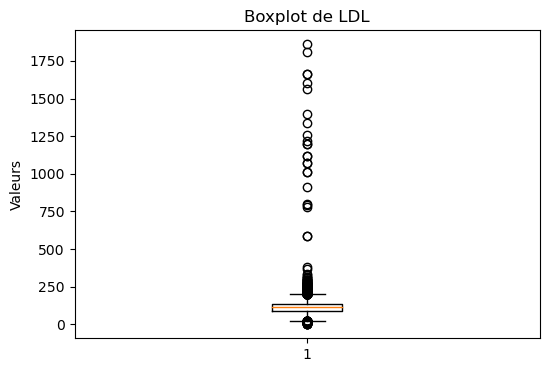

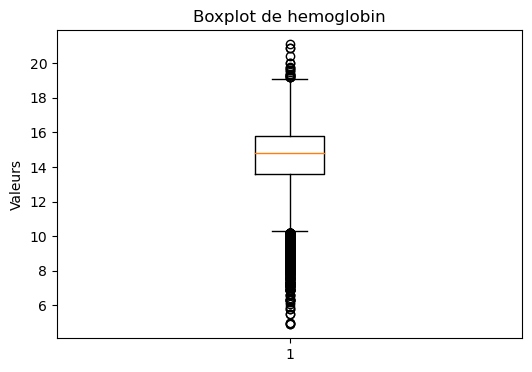

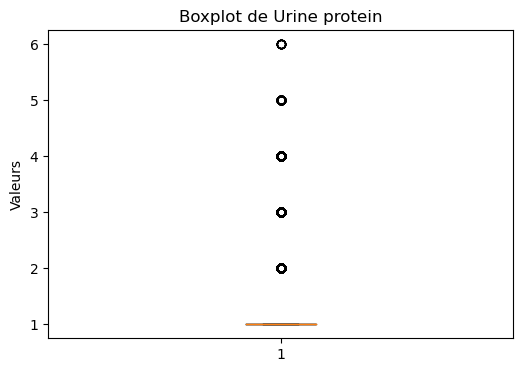

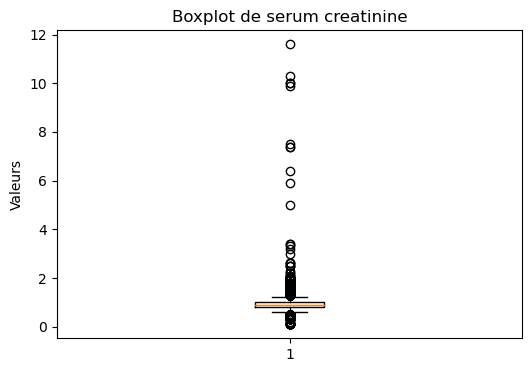

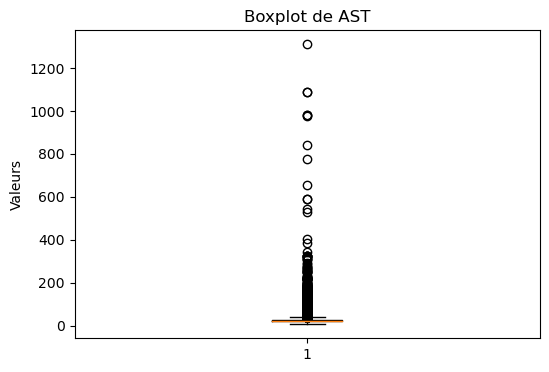

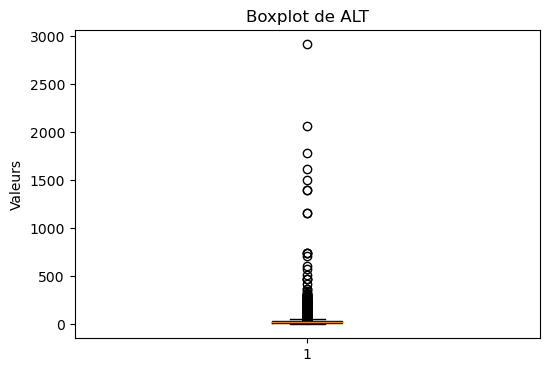

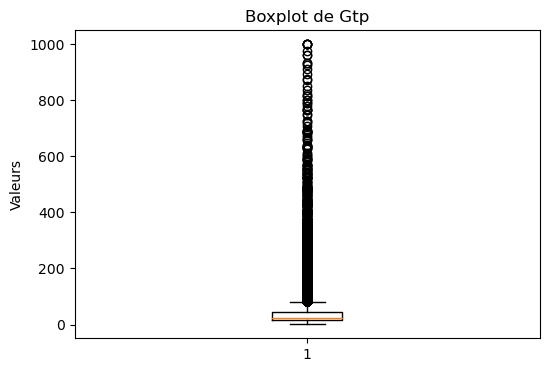

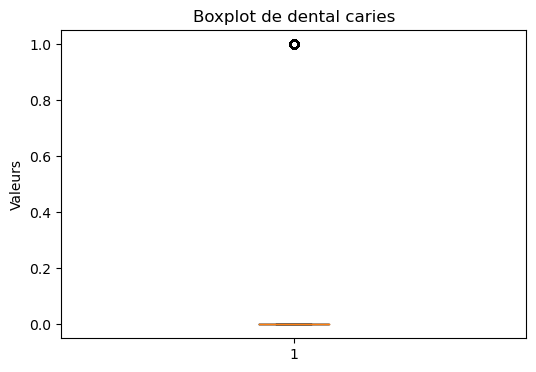

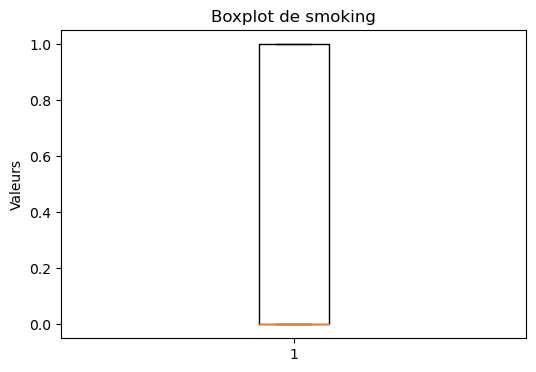

In [29]:
for column in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column])
    plt.title(f'Boxplot de {column}')
    plt.ylabel('Valeurs')
    plt.show()

On remarque des outliers dans nos donnees qu'il va faloir detecter et suprimer dans la partie preprocessing

# Clusterisating des donnees
 
   ### Determinons le nombre de cluster

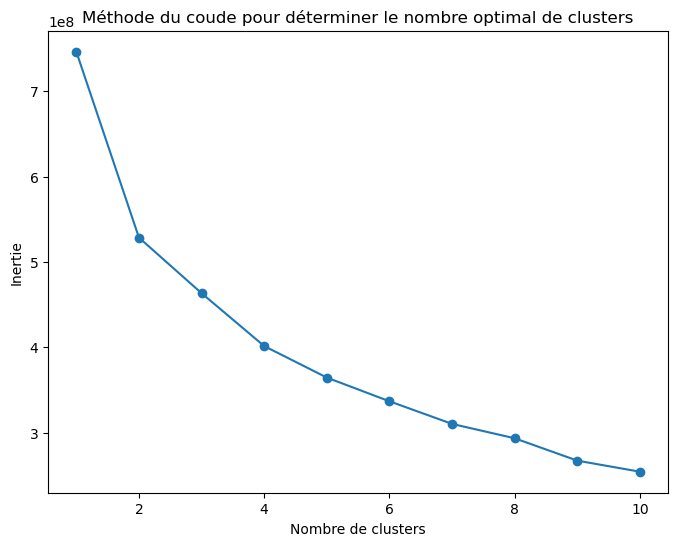

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[numeric_cols])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie")
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

On sait deja que le nombre de clusters sera égale à 2 car on est dans un cas de classification binaire . Cependant , on a preferé confirmer ca en utilisant la méthode du coude ( 'elbow' ) et on remarque une cohérence dans nos résultats

In [31]:
num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(df[numeric_cols])

KMeans(n_clusters=2)

# Réduction de dimension avec PCA

In [32]:
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(df[numeric_cols])

Déterminons le nombre de dimensions optimal 

Text(0, 0.5, 'cumulative explained variance')

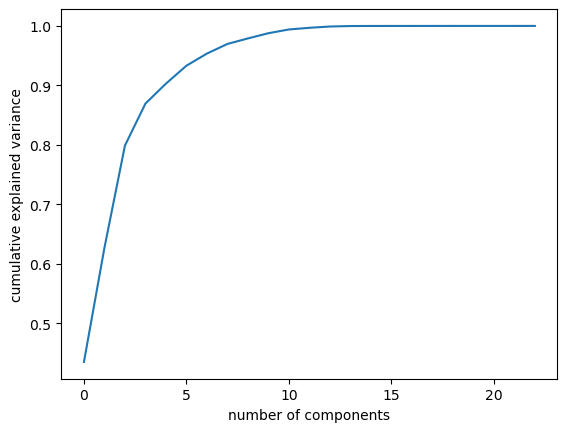

In [33]:
pca = PCA().fit(df[numeric_cols])
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [34]:
d = np.argmax(cumsum >= 0.95) + 1
d

7

Pour préserver plus de 95% de richesse , une base de 7 élements est nécessaire 

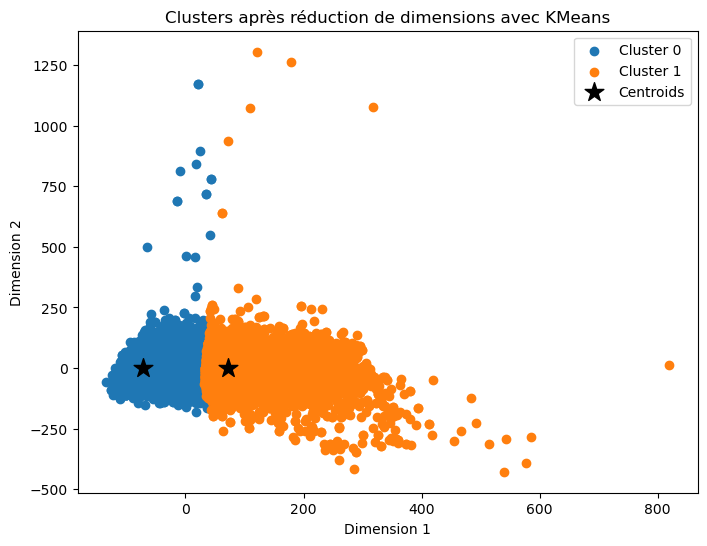

In [35]:
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    plt.scatter(reduced_df[kmeans.labels_ == cluster][:, 0], reduced_df[kmeans.labels_ == cluster][:, 1], label=f'Cluster {cluster}')

centroids = kmeans.cluster_centers_
transformed_clusters = pca.fit_transform(centroids)


plt.scatter(transformed_clusters[:, 0], transformed_clusters[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.title('Clusters après réduction de dimensions avec KMeans')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

Avec une préservation de 80% de richesse (2 dimensions) , ce qui est acceptable , on arrive à bien distinguer les clusters .
Nos données sont donc prés à etre utilisés pour les modéles de ML

<div style="width: 90%; margin: auto; background-color:  #274d3e; padding: 20px; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3); color: #ffffff; text-align: center; font-style: italic;" markdown="1">
    <span style="font-style: italic; font-size: 30px; font-weight: bold; ">DATA PROCESSING</span>
</div>

# Détection et élimination d'outliers

In [36]:
from collections import Counter
import numpy as np

def outlier_detection(df, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(df[(df[col] < Q1 - outlier_point)|(df[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n:
            will_drop_train.append(r)
    return will_drop_train

will_drop_train = outlier_detection(df, 5, df.select_dtypes(["float", "int"]).columns)
will_drop_train[0:4]

[44, 3368, 3592, 4171]

In [37]:
df.drop(will_drop_train, inplace = True, axis = 0)

# Encodage
Transformation de données catégoriques en valeurs numériques avec LabelEncoder

In [38]:
lbe = LabelEncoder()
lbe.fit_transform(df["gender"])
df["gender"] = lbe.fit_transform(df["gender"])

lbe = LabelEncoder()
lbe.fit_transform(df["tartar"])
df["tartar"] = lbe.fit_transform(df["tartar"])

lbe = LabelEncoder()
lbe.fit_transform(df["oral"])
df["oral"] = lbe.fit_transform(df["oral"])

### separation de la target et des features

In [39]:
#target
y = df["smoking"]

#features
x = df.drop("smoking", axis = 1)

### Division des données en données d'entrainement ( train_set ) et données de test (test_set)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.10,
                                                    shuffle = True,
                                                    random_state = 1)

### Normalisation des données avec MinMaxScaler

In [41]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

<div style="width: 90%; margin: auto; background-color:  #274d3e; padding: 20px; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3); color: #ffffff; text-align: center; font-style: italic;" markdown="1">
    <span style="font-style: italic; font-size: 30px; font-weight: bold; ">BUILDING CLASSIFICATION MODELS</span>
</div>

# DummyClassifier

In [42]:
most_frequent_clf = DummyClassifier(strategy='most_frequent')
cross_val_score(most_frequent_clf,x_train,y_train,cv=3,scoring="accuracy")

array([0.63511469, 0.63511469, 0.63515313])

Le DummyClassifier sert à tester l'équilibre des données en prédisant toujours la variable smoking ( most_frequent ). Si on avait une dataset plus deséquilibrés que celle ci , on aurai pu avoir une accuracy qui dépasse les 90% alors que c'est pas intéressant et juste comme modèle . Ceci prouve que l'accuracy n'est pas un critére suffisant pour juger l'efficacité de nos modéles .

Pour cela , on se propose de rajouter d'autres statistiques intéressant pour affiner notre comparaison des modéles :
- Matrice confuion ( Confusion Matrix )
- F1 Score
- ROC Curve

# RandomForestClassifier

In [43]:
rf_model = RandomForestClassifier(n_estimators = 250)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=250)

In [44]:
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)
print("Accuracy (train) :",accuracy_score(y_train, y_train_pred))
print("Accuracy (test) :",accuracy_score(y_test, y_test_pred))
accuracy_rf = accuracy_score(y_test, y_test_pred)

Accuracy (train) : 1.0
Accuracy (test) : 0.8405954974582426


On remarque deux choses par rapport l'accuracy :

- l'accuracy évaluée sur les données d'entrainement est plus élevée ; c'est en effet cohérent car le modéle a été entrainé sur ces données là , d'ou il y'a plus de probabilité qu'il fasse une fausse prédiction sur une donnée test que sur une donnée qu'il a pu déjà rencontré 
- l'accuracy (train) vaut  : Comme au début on avait choisi 2000 estimateurs , on s'est dis que ca peut etre un cas d'overfitting . Cependant , en diminuant le nombre d'estimateurs , on n'arrive tous de meme à avoir des valeurs >0.99

## Confusion Matrix


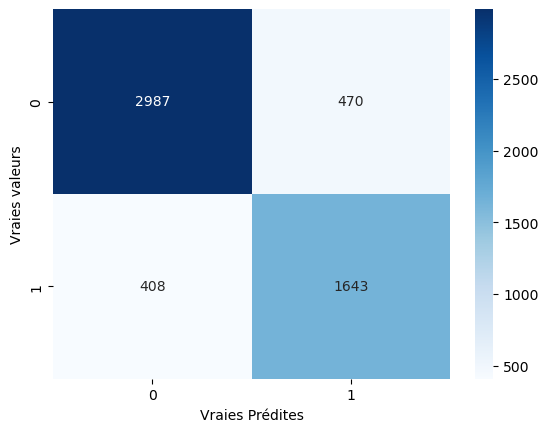

In [45]:
conf_matrix = confusion_matrix(y_test,y_test_pred)
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='d')
plt.xlabel('Vraies Prédites')
plt.ylabel('Vraies valeurs')
plt.show()

La matrice de confusion nous a permis de visualiser les prédictions du modèle par rapport aux valeurs réelles pour chaque classe. Cela inclut le nombre de vrais positifs, de vrais négatifs, de faux positifs et de faux négatifs.

À partir de la matrice de confusion, on peut calculer des métriques comme la precision, le Recall (ou sensibilité), le F1 score  et la spécificité. 



## F1 score


In [46]:
#f1_randomforest_train = f1_score(y_train,y_train_pred)
f1_randomforest_test = f1_score(y_test,y_test_pred)
print(f1_randomforest_test)

0.7891450528338136


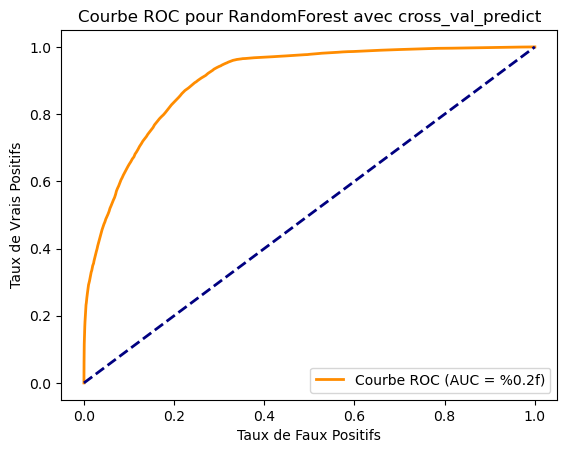

In [47]:
y_scores = cross_val_predict(rf_model,x_train,y_train,cv=3,method='predict_proba')[:,1]
fpr,tpr,tresholds = roc_curve(y_train,y_scores)

roc_auc_rf = auc(fpr,tpr)

# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC pour RandomForest avec cross_val_predict')
plt.legend(loc='lower right')
plt.show()

Une courbe ROC idéale se rapproche du coin supérieur gauche du graphique, représentant un modèle avec une sensibilité élevée et une spécificité élevée pour tous les seuils de classification.

# Gradient Boosting ( LightGBM )

In [48]:
lgb_model = LGBMClassifier(n_estimators=250)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 18086, number of negative: 31482
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2378
[LightGBM] [Info] Number of data points in the train set: 49568, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364872 -> initscore=-0.554278
[LightGBM] [Info] Start training from score -0.554278


LGBMClassifier(n_estimators=250)

In [49]:
y_train_pred = lgb_model.predict(x_train)
y_test_pred = lgb_model.predict(x_test)


In [50]:
print("Accuracy (train) :", accuracy_score(y_train, y_train_pred))
print("Accuracy (test) :", accuracy_score(y_test, y_test_pred))
accuracy_lgb = accuracy_score(y_test, y_test_pred)

Accuracy (train) : 0.852525823111685
Accuracy (test) : 0.7870370370370371


On remarque que l'accuracy de ce modéle est inférieur à celle du modéle précédent (mais il se peut qu'il soit meilleur : on ne peut pas conclure qu'avec le calcul de l'accuracy )

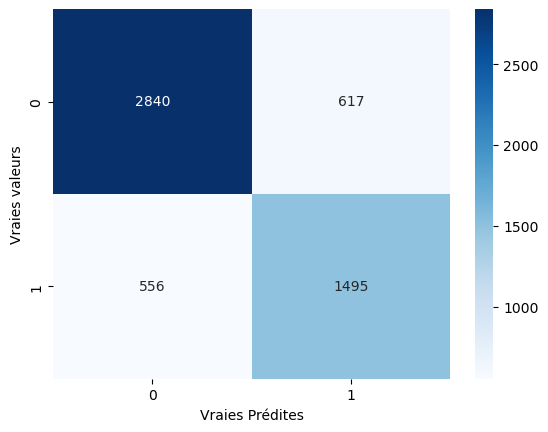

In [51]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Vraies Prédites')
plt.ylabel('Vraies valeurs')
plt.show()

In [52]:
f1_lightgbm_test = f1_score(y_test, y_test_pred)
print(f1_lightgbm_test)

0.7182320441988951


La meme remarque pour le F1 score ( plus faible aussi )

[LightGBM] [Info] Number of positive: 12057, number of negative: 20988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2280
[LightGBM] [Info] Number of data points in the train set: 33045, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364866 -> initscore=-0.554305
[LightGBM] [Info] Start training from score -0.554305
[LightGBM] [Info] Number of positive: 12057, number of negative: 20988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2260
[LightGBM] [Info] Number of data points in the train set: 33045, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364866 -> initscore=-0.554305
[LightGBM] [Info] Start training from score -0.554305
[LightGBM] [

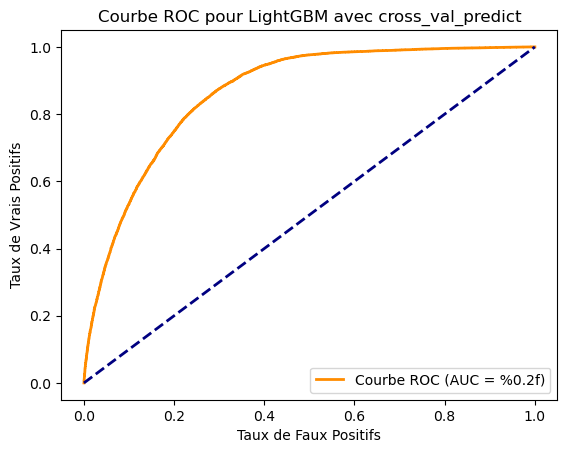

In [53]:
y_scores = cross_val_predict(lgb_model, x_train, y_train, cv=3, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
roc_auc_lgb = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC pour LightGBM avec cross_val_predict')
plt.legend(loc='lower right')
plt.show()

# XgboostClassifier

In [54]:
xgb_model = XGBClassifier(n_estimators=250)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

In [56]:
print("Accuracy (train) :", accuracy_score(y_train, y_train_pred))
print("Accuracy (test) :", accuracy_score(y_test, y_test_pred))
accuracy_xgb = accuracy_score(y_test, y_test_pred)

Accuracy (train) : 0.9368140735958683
Accuracy (test) : 0.8046477850399419


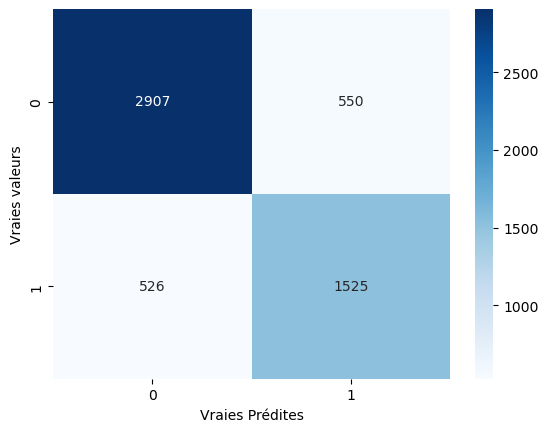

In [57]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Vraies Prédites')
plt.ylabel('Vraies valeurs')
plt.show()

In [58]:
f1_xgboost_test = f1_score(y_test, y_test_pred)
print(f1_xgboost_test)

0.739214735821619


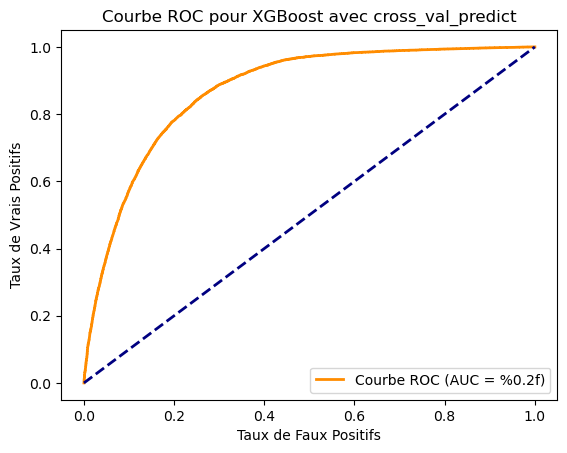

In [59]:
y_scores = cross_val_predict(xgb_model, x_train, y_train, cv=3, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
roc_auc_xgb = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC pour XGBoost avec cross_val_predict')
plt.legend(loc='lower right')
plt.show()

On arrive pas encore à avoir un modéle avec des plus bons résultats que RandomForest .

Voyons si le fait de créer un modéle qui fera voter ces 3 derniers ensembles pour choisr une seule prédiction sera plus efficace !

# VotingClassifier (Ensemble Methods)

In [60]:
rf_model = RandomForestClassifier(n_estimators=250)
lgb_model = LGBMClassifier(n_estimators=250)
xgb_model = XGBClassifier(n_estimators=250)

choix des 3 modéles

In [61]:
voting_clf = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('lightgbm', lgb_model),
    ('xgboost', xgb_model)
], voting='soft')

In [62]:
voting_clf.fit(x_train, y_train)


[LightGBM] [Info] Number of positive: 18086, number of negative: 31482
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2378
[LightGBM] [Info] Number of data points in the train set: 49568, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364872 -> initscore=-0.554278
[LightGBM] [Info] Start training from score -0.554278


VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(n_estimators=250)),
                             ('lightgbm', LGBMClassifier(n_estimators=250)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, ma

In [63]:
y_train_pred = voting_clf.predict(x_train)
y_test_pred = voting_clf.predict(x_test)

In [64]:
print("Accuracy (train) :", accuracy_score(y_train, y_train_pred))
print("Accuracy (test) :", accuracy_score(y_test, y_test_pred))
accuracy_voting = accuracy_score(y_test, y_test_pred)

Accuracy (train) : 0.9741970626210459
Accuracy (test) : 0.831517792302106


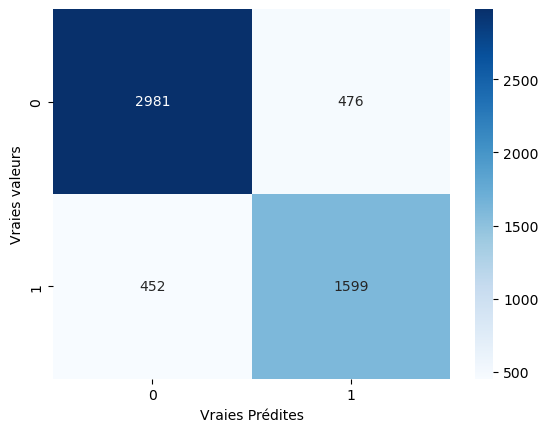

In [65]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Vraies Prédites')
plt.ylabel('Vraies valeurs')
plt.show()

In [66]:
f1_voting_test = f1_score(y_test, y_test_pred)
print(f1_voting_test)

0.7750848279205041


[LightGBM] [Info] Number of positive: 12057, number of negative: 20988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2280
[LightGBM] [Info] Number of data points in the train set: 33045, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364866 -> initscore=-0.554305
[LightGBM] [Info] Start training from score -0.554305
[LightGBM] [Info] Number of positive: 12057, number of negative: 20988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2260
[LightGBM] [Info] Number of data points in the train set: 33045, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364866 -> initscore=-0.554305
[LightGBM] [Info] Start training from score -0.554305
[LightGBM] [

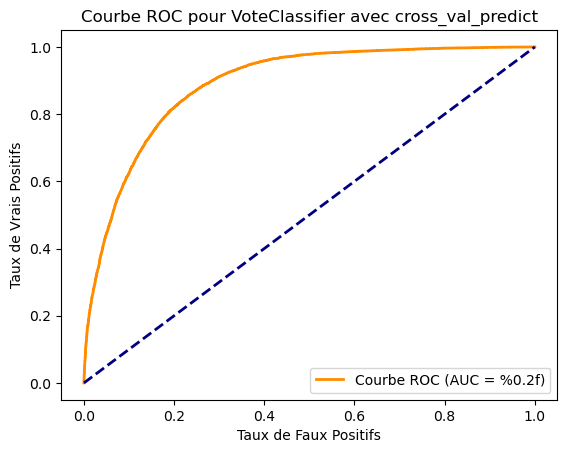

In [67]:
y_scores = cross_val_predict(voting_clf, x_train, y_train, cv=3, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
roc_auc_voting = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC pour VoteClassifier avec cross_val_predict')
plt.legend(loc='lower right')
plt.show()

On s'approche des résultats de RandomForest mais on reste tous de meme moins performant . D'autres méthodes non vues en cours notamment de classification par réseaux de neurones pourrait donner des résultats trés satisfaisant . 

<div style="width: 90%; margin: auto; background-color:  #274d3e; padding: 20px; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3); color: #ffffff; text-align: center; font-style: italic;" markdown="1">
    <span style="font-style: italic; font-size: 30px; font-weight: bold; ">Model comparaison and Hyperparameter optimization</span>
</div>

Hyperparameter Tuning for RF:
Best parameters: {'max_depth': None, 'n_estimators': 500}
Accuracy: 0.8437 (RF)
Precision: 0.7791 (RF)
Recall: 0.8098 (RF)
F1 Score: 0.7942 (RF)
Execution Time: 346.14 seconds

Hyperparameter Tuning for XGBoost:
Best parameters: {'learning_rate': 0.1, 'n_estimators': 500}
Accuracy: 0.7997 (XGBoost)
Precision: 0.7288 (XGBoost)
Recall: 0.7362 (XGBoost)
F1 Score: 0.7325 (XGBoost)
Execution Time: 45.91 seconds

Hyperparameter Tuning for LightGBM:
[LightGBM] [Info] Number of positive: 18086, number of negative: 31482
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2378
[LightGBM] [Info] Number of data points in the train set: 49568, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364872 -> initscore=-0.554278
[LightGBM] [Info] Start training from score -0.554278
Best parameters: {'learning_r

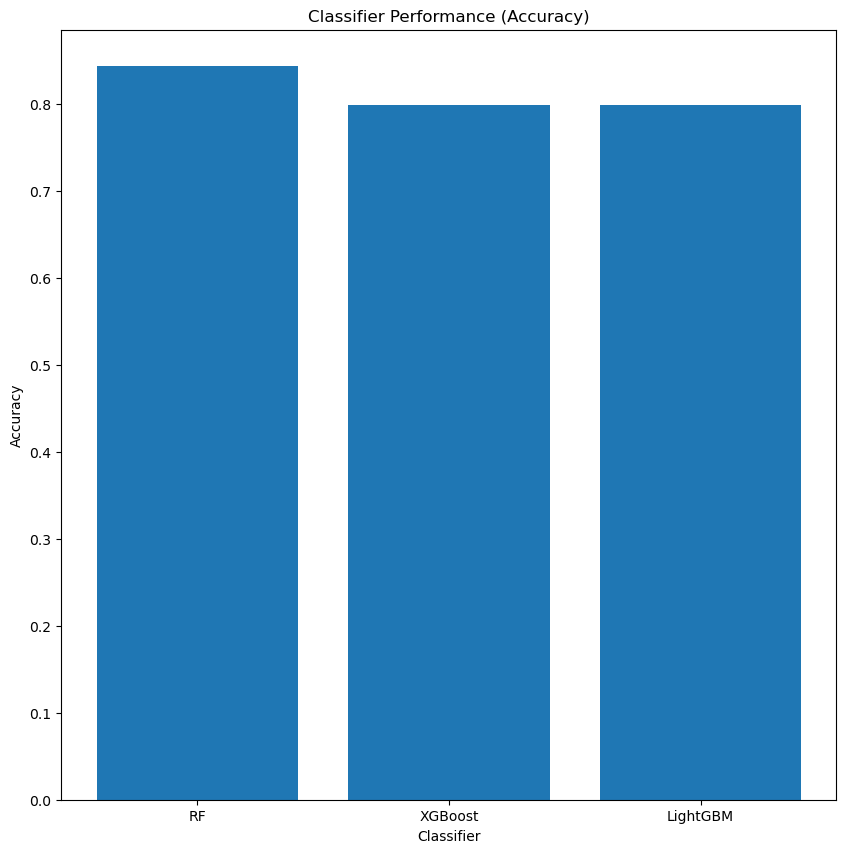

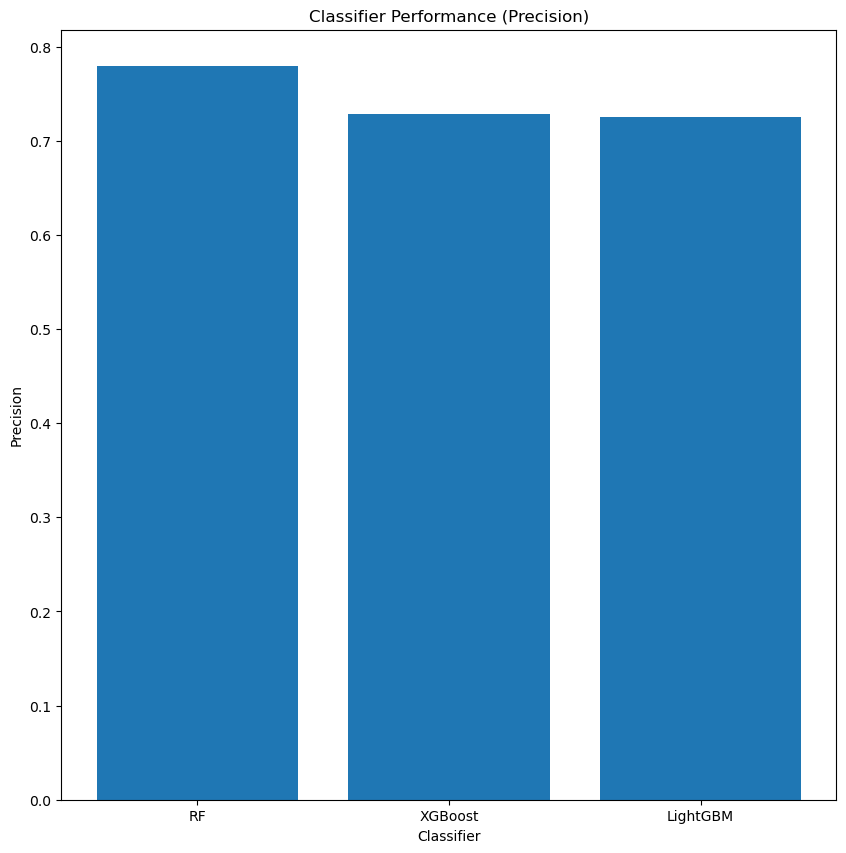

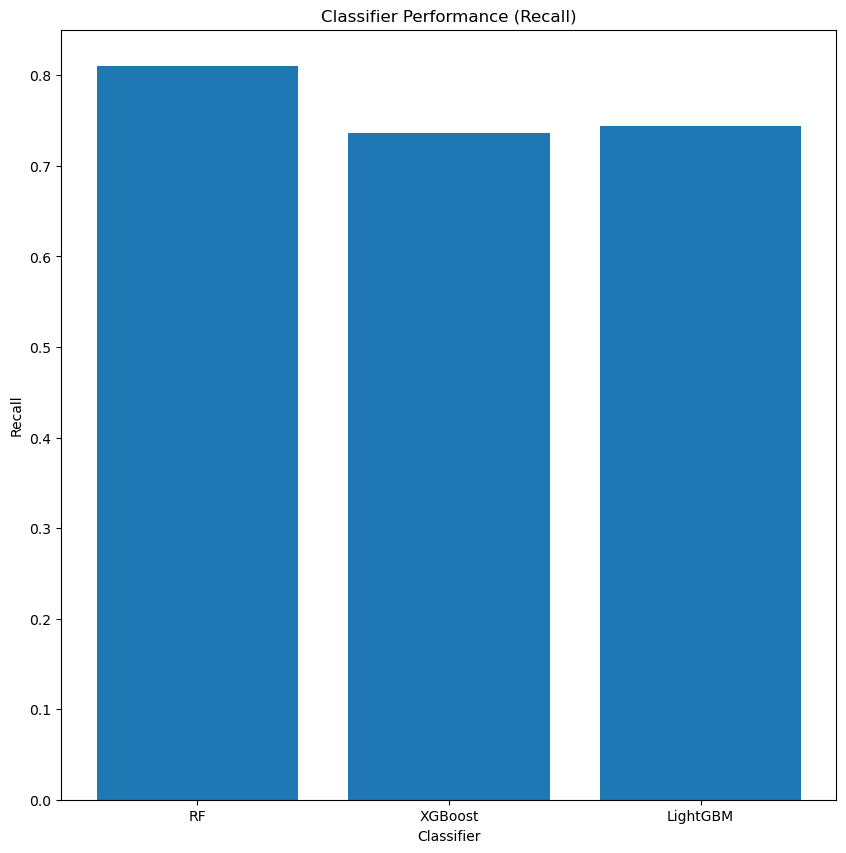

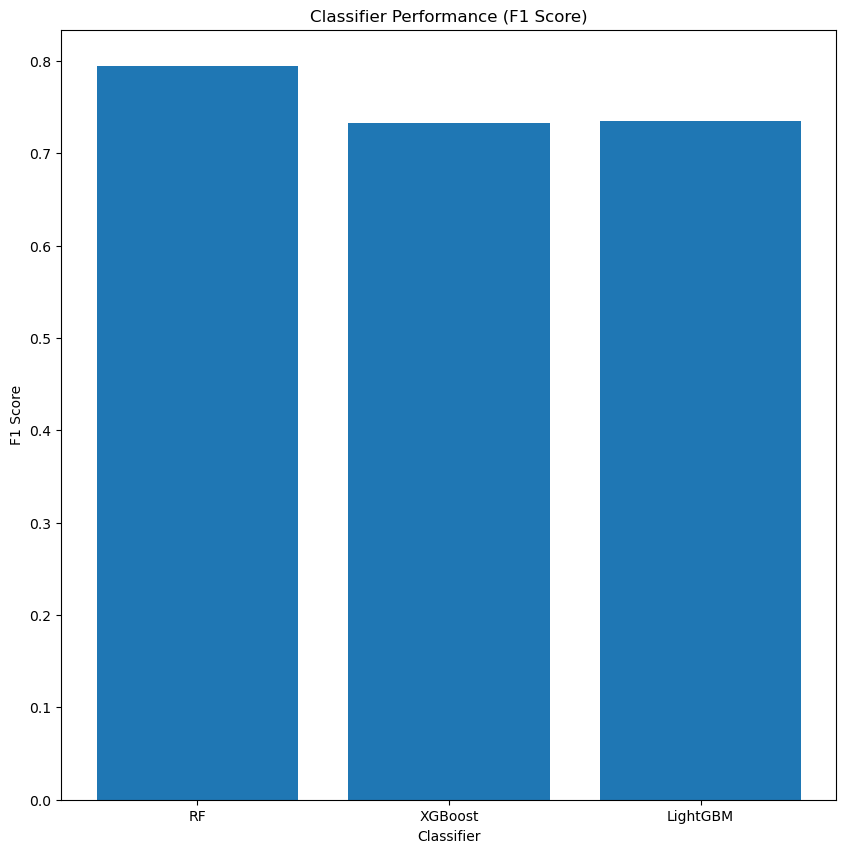

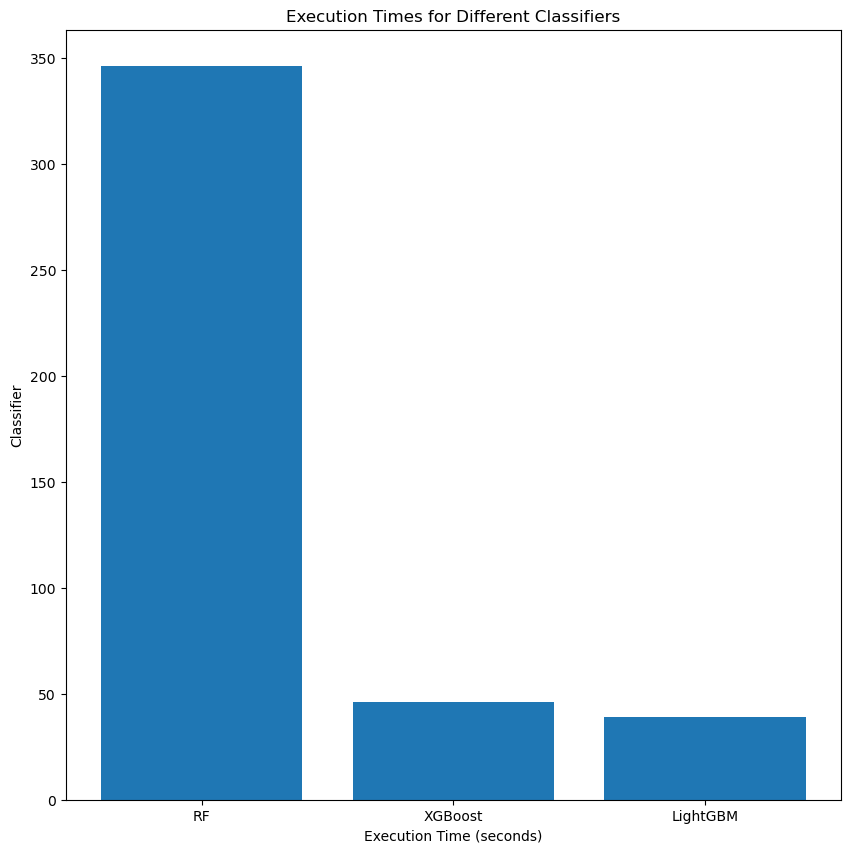

In [79]:
# Initialize the models
classifiers = [('RF', RandomForestClassifier()),
               ("XGBoost", XGBClassifier(objective='binary:logistic')),
               ("LightGBM", LGBMClassifier()),]

# Initialize lists to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
execution_times = []

# Define the hyperparameters for each model
param_grids = {
    'RF': {'n_estimators': [250, 500], 'max_depth': [None, 10]},
    'XGBoost': {'n_estimators': [250, 500], 'learning_rate': [0.01, 0.1]},
    'LightGBM': {'n_estimators': [250, 500], 'learning_rate': [0.01, 0.1]},
}

# Train and evaluate the models with hyperparameter tuning
for name, classifier in classifiers:
    print(f"Hyperparameter Tuning for {name}:")
    start_time = time.time()

    if param_grids[name]:
        grid_search = GridSearchCV(classifier, param_grid=param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(x_train, y_train)
        best_model = grid_search.best_estimator_

        print(f"Best parameters: {grid_search.best_params_}")
    else:
        best_model = classifier.fit(x_train, y_train)

    # Make predictions
    y_pred = best_model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)

    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Calculate the execution time of the model
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    print(f"Accuracy: {round(accuracy, 4)} ({name})")
    print(f"Precision: {round(precision, 4)} ({name})")
    print(f"Recall: {round(recall, 4)} ({name})")
    print(f"F1 Score: {round(f1, 4)} ({name})")
    print(f"Execution Time: {round(execution_time, 2)} seconds\n")

# Plot Accuracy scores
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in classifiers], accuracy_scores)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Classifier Performance (Accuracy)")
plt.show()

# Plot Precision scores
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in classifiers], precision_scores)
plt.xlabel("Classifier")
plt.ylabel("Precision")
plt.title("Classifier Performance (Precision)")
plt.show()

# Plot Recall scores
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in classifiers], recall_scores)
plt.xlabel("Classifier")
plt.ylabel("Recall")
plt.title("Classifier Performance (Recall)")
plt.show()

# Plot F1 scores
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in classifiers], f1_scores)
plt.xlabel("Classifier")
plt.ylabel("F1 Score")
plt.title("Classifier Performance (F1 Score)")
plt.show()

# Plot execution times
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in classifiers], execution_times)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Classifier")
plt.title("Execution Times for Different Classifiers")
plt.show()


In [81]:
best_model

LGBMClassifier(n_estimators=500)

En comparant les modéles qu'on a choisis d'utiliser , on s'apercoit qu'il y'a pas pas de grandes différences entre les modéles .Meme si le classificateur RandomForest dépasse les autres modéles en termes de scores (f1_score , accuracy , precision etc ...) le modéle LGBMClassifier a été élu meilleur .

<div style="width: 90%; margin: auto; background-color:  #274d3e; padding: 20px; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3); color: #ffffff; text-align: center; font-style: italic;" markdown="1">
    <span style="font-style: italic; font-size: 30px; font-weight: bold; ">Feature Importance</span>
</div>

In [83]:
final_model = best_model

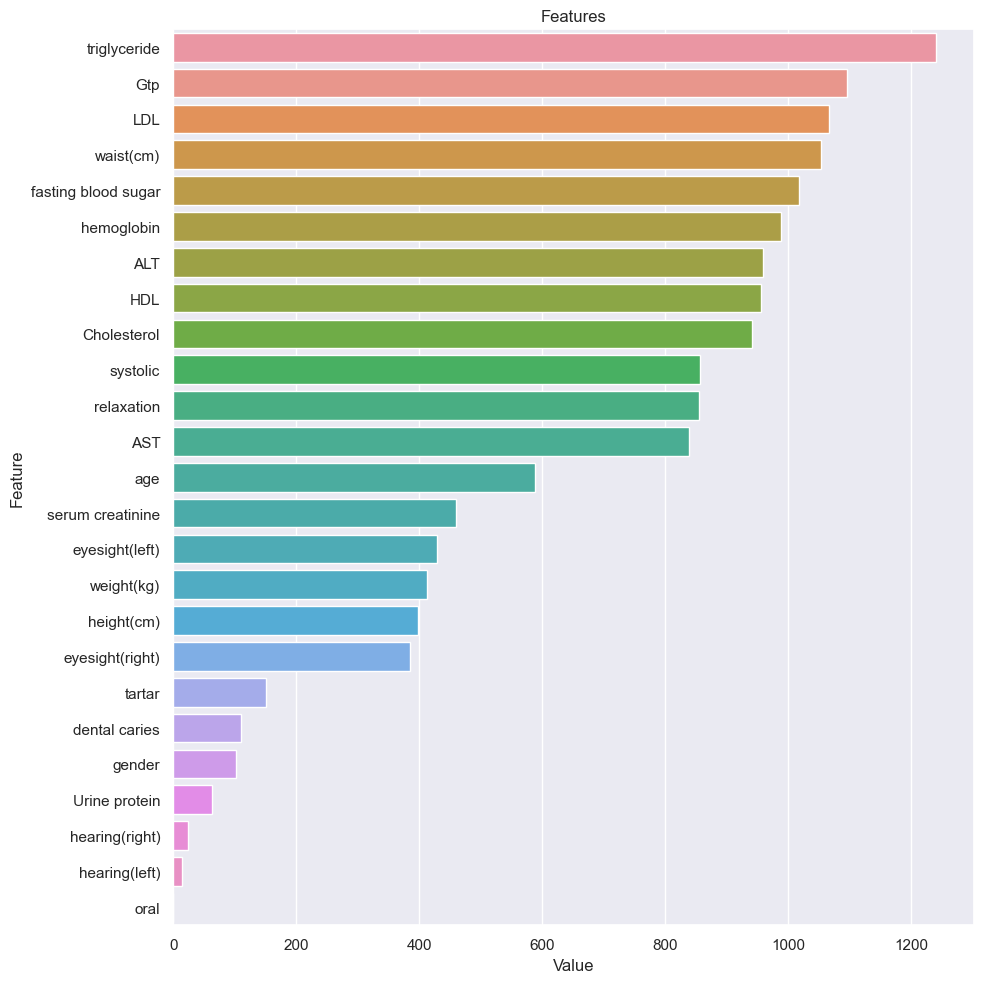

In [86]:
def plot_importance(model, features, num=50, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

plot_importance(final_model,x)

- Les résultats de l'importance des features indiquent que le niveau de triglycérides ( forme de graisse présente dans le sang ) est le plus significatif pour cette prédiction.

- En revanche, des features tels que "oral", "gender", "hearing" semblent avoir une contribution moindre dans la capacité du modèle à faire cette prédiction.